<a href="https://colab.research.google.com/github/Joshueleo9902/TallerIApages/blob/gh-pages/Pregunta_4_JoshueNavarrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre:** Joshue Navarrete 

**Pregunta 4**

In [ ]:
pip install imagehash

     |████████████████████████████████| 812 kB 4.1 MB/s 
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=a04efcc7564c4ba0c0194207b70faadcd4c3ea001bfe33783b8425bc09e037e8
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built imagehash


In [ ]:

#Librerias 
import numpy as np
import pandas as pd
import cv2  
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import imagehash

In [ ]:
images = ['https://placekitten.com/800/665']

In [ ]:
df = pd.DataFrame(columns=['image','ahash','phash','dhash','whash','colorhash'])

for url in images:
    file =  Image.fromarray(io.imread(url))
    data = {
        'image': url,
        'ahash': imagehash.average_hash(file),
        'phash': imagehash.phash(file),
        'dhash': imagehash.dhash(file),
        'whash': imagehash.whash(file),
        'colorhash': imagehash.colorhash(file),   
    }
    
    df = df.append(data, ignore_index=True)

In [ ]:
df.head(10)

,image,ahash,phash,dhash,whash,colorhash
0,https://placekitten.com/800/665,7f43030000333f7f,84719f4f528da31b,e88e8e84e5e766ec,7f47430000333fff,07e00000000


In [ ]:
pip install  distance

     |████████████████████████████████| 180 kB 4.0 MB/s 
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16275 sha256=6e3dffd849e11565e68cab50479d7bc41b9e4a1d6b968efc3635ecef53134005
  Stored in directory: /root/.cache/pip/wheels/b2/10/1b/96fca621a1be378e2fe104cfb0d160bb6cdf3d04a3d35266cc
Successfully built distance


In [ ]:
import distance

def find_similar_images(df, ahash_column, image_url):
    """Compare an unseen image to previously seen images and return
    a list of images ranked by their similarity according to the 
    Hamming distance of their average hash or ahash.
    
    :param df: Pandas dataframe containing image and ahash columns
    :param ahash_column: Name of ahash column
    :param image_url: URL of the unseen image to hash and compare
   
    :return
        Pandas dataframe containing the most similar images
    """
    
    file =  Image.fromarray(io.imread(url))
    ahash = str(imagehash.average_hash(file))
        
    df['hamming_distance'] = df.apply(\
    lambda x: distance.hamming(str(x[ahash_column]), ahash), axis=1)

    df = df[['image','ahash','hamming_distance']]\
    .sort_values(by='hamming_distance', ascending=True)
    
    return df

In [ ]:
df = find_similar_images(df, 'ahash', 'https://placekitten.com/800/665')
df.head()

,image,ahash,hamming_distance
0,https://placekitten.com/800/665,7f43030000333f7f,0


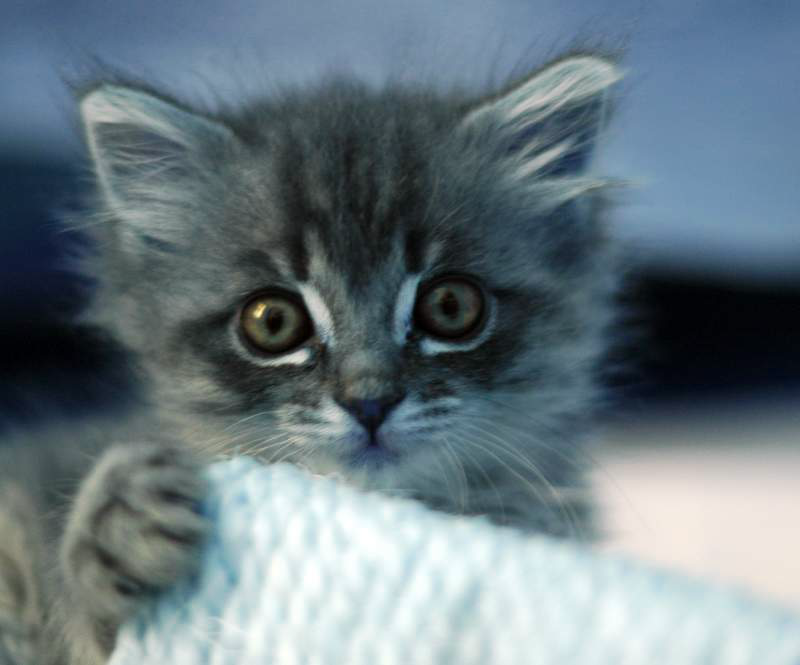

In [ ]:
# Ejercicio muestre la imagen m'as similar de un dataset
img =  io.imread('https://placekitten.com/800/665')
cv2_imshow(img)
